In [377]:
import numpy as np
import pandas as pd
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn import metrics
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from sklearn.linear_model import LassoCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
sns.set()
import warnings
warnings.filterwarnings("ignore")
import torch.nn as nn
from adapt.instance_based import KLIEP

In [378]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.cross_decomposition import CCA
from sklearn.cross_decomposition import PLSCanonical
from sklearn.cross_decomposition import PLSSVD
def softmax(x):
    return(np.exp(x)/np.exp(x).sum())

def my_custom_loss_func_exp(y_true, y_pred):
    return spearmanr(np.exp(y_true), np.exp(y_pred)).correlation  

def my_custom_loss_func(y_true, y_pred):
    #y_pred = np.exp(np.array(y_pred))
    return spearmanr(y_true, y_pred).correlation

def evaluate_model_mean(X, y, model, test_size=0.33, loss = my_custom_loss_func, state = 100):
    
    score = []
    for i in range(14,16):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,random_state=i)
        X_train = np.array(X_train)
        X_test = np.array(X_test)
       
        model.fit(X_train,y_train)
        train_score = loss(y_train, model.predict(X_train))
        y_predict = model.predict(X_test)
        test_score = loss(y_test , y_predict.reshape(-1))
        score.append(test_score)
        
    return np.mean(np.array(score))





In [379]:
path = 'data/'
X_train = pd.read_csv( path + 'X_train.csv')
Y_train = pd.read_csv(path + 'Y_train.csv')
X_test = pd.read_csv(path + 'X_test.csv')

In [380]:
X_val_best = X_test.copy()
y_best = pd.read_csv("submissions/best_models/best_mape_augmented_3.csv")
X_val_best = pd.merge(X_val_best,y_best,on='ID')

y_val =  np.array(X_val_best['TARGET'])
y_val_sort = np.argsort(np.array(X_val_best['TARGET']))
X_val_best = X_val_best.drop(['TARGET','ID'],axis=1)
X_val_best

,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,FR_NET_IMPORT,...,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
0,241,FR,0.340083,-0.433604,-0.423521,0.423521,0.165333,0.519419,-0.165333,-0.519419,...,-0.222525,-0.513180,-0.182048,-0.982546,-0.876632,0.880491,0.692242,0.569419,-0.029697,-0.929256
1,1214,FR,0.803209,0.780411,0.601610,-0.601610,0.342802,0.555367,-0.342802,-0.555367,...,0.857739,-0.340595,-0.301094,-0.759816,-1.221443,-0.616617,-0.737496,0.251251,0.753646,0.664086
2,1047,FR,0.795540,0.721954,1.179158,-1.179158,1.620928,0.666901,-1.620928,-0.666901,...,0.447967,0.796475,-0.367248,0.376055,-0.483363,0.865138,0.120079,-1.485642,-0.326450,-0.349747
3,1139,FR,0.172555,-0.723427,-0.044539,0.044539,NaN,-0.205276,NaN,0.205276,...,-0.561295,-0.542606,-0.013291,-0.791119,-0.894309,0.239153,0.457457,-0.746863,2.262654,0.642069
4,842,FR,0.949714,0.420236,0.617391,-0.617391,0.608561,-0.240856,-0.608561,0.240856,...,0.503567,-0.230291,-0.609203,-0.744986,-1.196282,0.176557,0.312557,-2.219626,-0.509272,-0.488341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,213,DE,0.267684,-0.901332,0.749769,-0.749769,1.198565,-1.614458,-1.198565,1.614458,...,-1.057186,1.591562,-0.284628,2.272121,1.647899,-0.838634,-0.463684,-1.071829,0.720641,-1.842072
650,943,DE,1.389207,1.466549,0.661778,-0.661778,0.610986,-1.934012,-0.610986,1.934012,...,1.055349,0.155454,-0.168436,1.290495,2.199105,-0.329098,-1.172309,-1.290355,-0.897009,-0.925825
651,261,FR,1.377650,1.781671,0.557006,-0.557006,-0.326698,-1.462676,0.326698,1.462676,...,1.824478,-0.825759,-0.266881,-1.247165,-0.666308,-0.807636,-1.260777,0.931572,0.151169,0.474347
652,1082,DE,1.232202,1.971074,0.537247,-0.537247,-1.109420,-1.464287,1.109420,1.464287,...,1.964292,-0.145241,-0.358861,0.195383,-0.103433,1.352906,-0.485161,0.995363,-0.152287,2.067306


In [381]:
data = pd.merge(X_train, Y_train, on=['ID'])
all_data = data.copy()
all_data['train'] = 1
all_data = pd.concat([all_data,X_test])
all_data['TARGET'] = all_data['TARGET'].fillna(0)
all_data['train'] = all_data['train'].fillna(0)

In [382]:
from sklearn.impute import KNNImputer

def regress_var(df, x_columns, y_column, model, out = True):
    temp = df.dropna().copy()
    X = np.array(temp[x_columns])
    y = np.array(temp[y_column])
    model.fit(X,y)
    if(out):
        print("Model score", model.score(X,y))
    return df.apply(lambda row: model.predict(np.array(row[x_columns]).reshape(-1,len(x_columns)))[0] if(np.isnan(row[y_column])) else row[y_column], axis=1)


def clean_knn(all_data_clean):
    imputer = KNNImputer(n_neighbors=2)
    remove_columns = ['ID','DAY_ID','TARGET','train']
    keep = all_data_clean.columns.difference(remove_columns)
    all_data_clean[keep] = imputer.fit_transform(all_data_clean[keep])
    return all_data_clean
    
def clean_regression(all_data_clean):
    
    #all_data_clean['DE_FR_EXCHANGE'] = all_data_clean['DE_FR_EXCHANGE'].fillna(0)
    #all_data_clean['FR_DE_EXCHANGE'] = all_data_clean['FR_DE_EXCHANGE'].fillna(0)
    
    all_data_clean['DE_FR_EXCHANGE'] = all_data_clean['DE_FR_EXCHANGE'].fillna(all_data_clean['DE_FR_EXCHANGE'].mean(numeric_only=True))
    all_data_clean['FR_DE_EXCHANGE'] = all_data_clean['FR_DE_EXCHANGE'].fillna(all_data_clean['FR_DE_EXCHANGE'].mean(numeric_only=True))
    
    x_columns = ['DE_FR_EXCHANGE']
    y_column = 'DE_NET_EXPORT'
    all_data_clean[y_column] = regress_var(all_data_clean, x_columns, y_column, LinearRegression(), out=True)
    all_data_clean['DE_NET_IMPORT'] = - all_data_clean['DE_NET_EXPORT']
    
    x_columns = ['FR_DE_EXCHANGE']
    y_column = 'FR_NET_EXPORT'
    all_data_clean[y_column] = regress_var(all_data_clean, x_columns, y_column, LinearRegression(), out=True)
    all_data_clean['FR_NET_IMPORT'] = - all_data_clean['FR_NET_EXPORT']
    
    all_data_clean = all_data_clean.fillna(all_data_clean.mean(numeric_only=True))
    
    return all_data_clean

def remove_features(all_data_clean):
    
    all_data_clean = all_data_clean.drop(['DE_FR_EXCHANGE', 'FR_NET_IMPORT','DE_NET_IMPORT'],axis=1)
    all_data_clean['FR_NET_EXPORT'] -= all_data_clean['FR_DE_EXCHANGE']
    all_data_clean['DE_NET_EXPORT'] += all_data_clean['FR_DE_EXCHANGE']
    
    
    all_data_clean['DE_CONSUMPTION'] -= all_data_clean['DE_RESIDUAL_LOAD']
    all_data_clean['FR_CONSUMPTION'] -= all_data_clean['FR_RESIDUAL_LOAD']

    
    all_data_clean = all_data_clean.rename(columns={'DE_CONSUMPTION':'DE_CONSUMPTION_RENEWABLE', 'FR_CONSUMPTION':'FR_CONSUMPTION_RENEWABLE' })
   
    '''
    all_data_clean['DE_FLOW_GAS'] = all_data_clean['DE_GAS']*all_data_clean['GAS_RET']
    all_data_clean['DE_FLOW_COAL'] = all_data_clean['DE_COAL']*all_data_clean['COAL_RET']
    all_data_clean['DE_FLOW_LIGNITE'] = all_data_clean['DE_LIGNITE']*all_data_clean['CARBON_RET']


    all_data_clean['FR_FLOW_GAS'] = all_data_clean['FR_GAS']*all_data_clean['GAS_RET']
    all_data_clean['FR_FLOW_COAL'] = all_data_clean['FR_COAL']*all_data_clean['COAL_RET']
    '''
    return all_data_clean

def add_clusters(k, all_data_clean,cols,c):
    from sklearn.cluster import KMeans
    X_season = all_data_clean[cols]
    all_data_clean = all_data_clean.drop(cols,axis=1)
    kmeans = KMeans(n_clusters=k,random_state = 0).fit(np.array(X_season))
    all_data_clean[c] = kmeans.predict(np.array(X_season))
    all_data_clean = pd.get_dummies(all_data_clean, columns=[c])
    return all_data_clean


def replace_outliers(all_data_clean, cols, threshold = 3):
    for c in cols :
        upper_limit = all_data_clean[c].mean() + threshold*all_data_clean[c].std()
        lower_limit = all_data_clean[c].mean() - threshold*all_data_clean[c].std()    
        all_data_clean[c] = np.where(
            (all_data_clean[c]>upper_limit) & (all_data_clean['train']==0),
            upper_limit,
            np.where(
                (all_data_clean[c]<lower_limit) & (all_data_clean['train']==0),
                lower_limit,
                all_data_clean[c]
            ))
    return all_data_clean

def remove_outliers(all_data_clean, cols, threshold = 3):
    for c in cols :
        upper_limit = all_data_clean[c].mean() + threshold*all_data_clean[c].std()
        lower_limit = all_data_clean[c].mean() - threshold*all_data_clean[c].std()    
        all_data_clean[c] = np.where(
            (all_data_clean[c]>upper_limit) & (all_data_clean['train']==1),
            np.nan,
            np.where(
                (all_data_clean[c]<lower_limit) & (all_data_clean['train']==1),
                np.nan,
                all_data_clean[c]
            ))
    all_data_clean = all_data_clean.dropna()
    return all_data_clean

In [383]:
all_data_clean = all_data.copy()
all_data_clean['COUNTRY'] = all_data_clean['COUNTRY'].apply(lambda x: 0 if x =='FR' else 1)

#clean
all_data_clean = clean_regression(all_data_clean)

#remove features
all_data_clean = remove_features(all_data_clean)


columns = ['FR_DE_EXCHANGE', 'DE_NET_EXPORT',
       'FR_NET_EXPORT', 'DE_GAS', 'FR_GAS', 'DE_COAL', 'FR_COAL', 'DE_HYDRO',
       'FR_HYDRO', 'DE_NUCLEAR', 'FR_NUCLEAR', 'DE_SOLAR', 'FR_SOLAR',
       'DE_WINDPOW', 'FR_WINDPOW', 'DE_LIGNITE', 'DE_RESIDUAL_LOAD',
       'FR_RESIDUAL_LOAD', 'GAS_RET', 'COAL_RET', 'CARBON_RET']

all_data_clean = remove_outliers(all_data_clean, columns)

all_data_clean = replace_outliers(all_data_clean, columns, threshold=2.5)

'''
cols = ['DE_RAIN','FR_RAIN','DE_WIND','FR_WIND','DE_TEMP','FR_TEMP']
all_data_clean = add_clusters(4,all_data_clean,cols,'season')




cols = ['FR_GAS', 'FR_COAL', 'FR_HYDRO', 'FR_NUCLEAR', 'FR_SOLAR', 'FR_WINDPOW']
all_data_clean = add_clusters(4,all_data_clean,cols,'E_FR')


cols = ['DE_GAS', 'DE_COAL', 'DE_HYDRO', 'DE_NUCLEAR', 'DE_SOLAR', 'DE_WINDPOW', 'DE_LIGNITE']
all_data_clean = add_clusters(4,all_data_clean,cols,'E_DE')


cols = ['FR_GAS', 'FR_COAL','FR_RESIDUAL_LOAD']
all_data_clean = add_clusters(4,all_data_clean,cols,'N_FR')

cols = ['DE_GAS', 'DE_COAL','DE_RESIDUAL_LOAD']
all_data_clean = add_clusters(4,all_data_clean,cols,'N_DE')
'''

Model score 0.49328444244850245
Model score 0.4424460230408356


"\ncols = ['DE_RAIN','FR_RAIN','DE_WIND','FR_WIND','DE_TEMP','FR_TEMP']\nall_data_clean = add_clusters(4,all_data_clean,cols,'season')\n\n\n\n\ncols = ['FR_GAS', 'FR_COAL', 'FR_HYDRO', 'FR_NUCLEAR', 'FR_SOLAR', 'FR_WINDPOW']\nall_data_clean = add_clusters(4,all_data_clean,cols,'E_FR')\n\n\ncols = ['DE_GAS', 'DE_COAL', 'DE_HYDRO', 'DE_NUCLEAR', 'DE_SOLAR', 'DE_WINDPOW', 'DE_LIGNITE']\nall_data_clean = add_clusters(4,all_data_clean,cols,'E_DE')\n\n\ncols = ['FR_GAS', 'FR_COAL','FR_RESIDUAL_LOAD']\nall_data_clean = add_clusters(4,all_data_clean,cols,'N_FR')\n\ncols = ['DE_GAS', 'DE_COAL','DE_RESIDUAL_LOAD']\nall_data_clean = add_clusters(4,all_data_clean,cols,'N_DE')\n"

In [384]:
X_train = all_data_clean[all_data_clean['train'] == 1].drop(['train','TARGET','ID','DAY_ID'],axis=1)
X_test = all_data_clean[all_data_clean['train'] == 0].drop(['train','TARGET','DAY_ID'],axis=1)
id_train = all_data_clean[all_data_clean['train'] == 1]['ID']
id_test = X_test['ID']
X_test = X_test.drop('ID',axis=1)
y_train = all_data_clean[all_data_clean['train'] == 1]['TARGET']


X_train_FR = all_data_clean[(all_data_clean['train'] == 1) & (all_data_clean['COUNTRY'] == 0)].drop(['train','TARGET','ID','DAY_ID','COUNTRY'],axis=1)
X_train_DE = all_data_clean[(all_data_clean['train'] == 1) & (all_data_clean['COUNTRY'] == 1)].drop(['train','TARGET','ID','DAY_ID','COUNTRY'],axis=1)
id_train_DE = all_data_clean[(all_data_clean['train'] == 1) & (all_data_clean['COUNTRY'] == 1)]['ID']
y_train_FR = all_data_clean[(all_data_clean['train'] == 1) & (all_data_clean['COUNTRY'] == 0)]['TARGET']
y_train_DE = all_data_clean[(all_data_clean['train'] == 1) & (all_data_clean['COUNTRY'] == 1)]['TARGET']

X_test_FR = all_data_clean[(all_data_clean['train'] == 0) & (all_data_clean['COUNTRY'] == 0)].drop(['train','TARGET','DAY_ID','COUNTRY'],axis=1)
id_test_FR = X_test_FR['ID']
X_test_FR = X_test_FR.drop('ID',axis=1)

X_test_DE = all_data_clean[(all_data_clean['train'] == 0) & (all_data_clean['COUNTRY'] == 1)].drop(['train','TARGET','DAY_ID','COUNTRY'],axis=1)
id_test_DE = X_test_DE['ID']
X_test_DE = X_test_DE.drop('ID',axis=1)

In [385]:
X_train['COUNTRY'] = 2*X_train['COUNTRY'] - 1 
X_test['COUNTRY'] = 2*X_test['COUNTRY'] - 1 

In [386]:
X_train.shape

(1379, 30)

In [387]:
cols = ['FR_NUCLEAR',
'DE_HYDRO',
'DE_GAS',
'DE_CONSUMPTION_RENEWABLE',
'CARBON_RET',
'DE_RESIDUAL_LOAD',
'DE_NET_EXPORT',
'FR_WINDPOW',
'COUNTRY'
]

cols = X_train.columns

#all_cols = cols.copy()[::-1]

In [388]:

for c in cols:
    if(c == 'COUNTRY'):
        continue
    X_train['COUNTRY_'+c] = X_train['COUNTRY']*X_train[c]
    X_test['COUNTRY_'+c] = X_test['COUNTRY']*X_test[c]
    #ll_cols.append('COUNTRY_'+c)
    
#X_train = X_train[all_cols]
#X_test = X_test[all_cols]


In [389]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(1,include_bias = False)
X_train_a  = poly.fit_transform(X_train)
X_test_a = poly.transform(X_test)
X_train = pd.DataFrame(columns=poly.get_feature_names(X_train.columns),data = np.array(X_train_a))
X_test = pd.DataFrame(columns=poly.get_feature_names(X_test.columns),data = np.array(X_test_a))

In [390]:
cols = ['FR_WINDPOW',
'DE_NET_EXPORT',
'DE_RESIDUAL_LOAD',
'CARBON_RET',
'DE_CONSUMPTION_RENEWABLE',
'DE_HYDRO',
'FR_NUCLEAR',
'COUNTRY_DE_HYDRO',
'COUNTRY_DE_CONSUMPTION_RENEWABLE',
'COUNTRY_CARBON_RET',
'COUNTRY_DE_RESIDUAL_LOAD']

#X_train = X_train[cols]
#X_test = X_test[cols]

In [391]:
from sklearn.preprocessing import StandardScaler

X = pd.concat([X_train,X_test])
#X = X.drop(['COUNTRY'],axis=1)

scaler = StandardScaler()
scaler.fit(X)
cols = X.columns
X_train[cols] = scaler.transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

In [392]:
#X_train = X_train[:250]
#y_train = y_train[:250]

In [393]:
X_val_best = X_test.copy()

In [394]:
y_train_sort = np.argsort(y_train)
y_train_sort

0        466
1        941
2        142
3        253
4       1114
        ... 
1488    1267
1489     166
1490     439
1491     631
1493     897
Name: TARGET, Length: 1379, dtype: int64

In [395]:
X_train['rank'] = np.array(y_train_sort)
X_train['v'] = np.array(y_train)

X_val_best['rank'] = np.array(y_val)

In [396]:
X_train_1 = X_train.copy()
X_train_merge = pd.merge(X_train,X_train_1,how='cross')
X_train_merge

,COUNTRY_x,DE_CONSUMPTION_RENEWABLE_x,FR_CONSUMPTION_RENEWABLE_x,FR_DE_EXCHANGE_x,DE_NET_EXPORT_x,FR_NET_EXPORT_x,DE_GAS_x,FR_GAS_x,DE_COAL_x,FR_COAL_x,...,COUNTRY_FR_RAIN_y,COUNTRY_DE_WIND_y,COUNTRY_FR_WIND_y,COUNTRY_DE_TEMP_y,COUNTRY_FR_TEMP_y,COUNTRY_GAS_RET_y,COUNTRY_COAL_RET_y,COUNTRY_CARBON_RET_y,rank_y,v_y
0,-0.877134,-0.800271,-0.466656,0.516089,0.199845,0.374063,-0.412925,-0.674693,1.057595,1.638901,...,0.559839,0.744818,0.208787,1.156638,0.075272,-0.345872,-0.112128,0.006977,466,0.028313
1,-0.877134,-0.800271,-0.466656,0.516089,0.199845,0.374063,-0.412925,-0.674693,1.057595,1.638901,...,0.772461,-1.669434,-0.949276,-0.448411,-1.887321,0.639622,-0.029988,0.518851,941,-0.112516
2,-0.877134,-0.800271,-0.466656,0.516089,0.199845,0.374063,-0.412925,-0.674693,1.057595,1.638901,...,0.318501,-0.530546,-0.594218,-0.712066,-0.109361,-0.540313,-0.768488,-0.210602,142,-0.180840
3,-0.877134,-0.800271,-0.466656,0.516089,0.199845,0.374063,-0.412925,-0.674693,1.057595,1.638901,...,-0.496732,-0.601805,-0.332346,0.391523,-0.422894,0.888985,-0.294166,1.131083,253,-0.260356
4,-0.877134,-0.800271,-0.466656,0.516089,0.199845,0.374063,-0.412925,-0.674693,1.057595,1.638901,...,0.428944,1.055148,0.967651,-0.636905,-0.746063,-0.253130,-1.599318,-2.738313,1114,-0.071733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1901636,1.140076,0.277265,-0.881602,-1.074855,-0.597092,-0.575373,-0.399020,-0.247644,-0.536918,0.339647,...,0.855981,-0.833752,-0.674414,1.211492,0.905940,-0.429560,0.091400,1.639828,1267,0.110206
1901637,1.140076,0.277265,-0.881602,-1.074855,-0.597092,-0.575373,-0.399020,-0.247644,-0.536918,0.339647,...,0.015725,0.027668,0.028045,0.011995,-0.000157,0.854756,0.889269,1.389605,166,-0.172597
1901638,1.140076,0.277265,-0.881602,-1.074855,-0.597092,-0.575373,-0.399020,-0.247644,-0.536918,0.339647,...,-0.001067,-0.188806,-0.200478,0.023256,0.019344,-0.931949,0.110880,-0.369438,439,-0.063546
1901639,1.140076,0.277265,-0.881602,-1.074855,-0.597092,-0.575373,-0.399020,-0.247644,-0.536918,0.339647,...,0.409295,-0.701151,0.845186,0.290734,0.426338,-1.109932,-0.232290,0.074861,631,0.151797


In [397]:
X_val_1 = X_val_best.copy()
X_val_best_merge = pd.merge(X_val_best,X_val_1,how='cross')
X_val_best_merge

,COUNTRY_x,DE_CONSUMPTION_RENEWABLE_x,FR_CONSUMPTION_RENEWABLE_x,FR_DE_EXCHANGE_x,DE_NET_EXPORT_x,FR_NET_EXPORT_x,DE_GAS_x,FR_GAS_x,DE_COAL_x,FR_COAL_x,...,COUNTRY_DE_RAIN_y,COUNTRY_FR_RAIN_y,COUNTRY_DE_WIND_y,COUNTRY_FR_WIND_y,COUNTRY_DE_TEMP_y,COUNTRY_FR_TEMP_y,COUNTRY_GAS_RET_y,COUNTRY_COAL_RET_y,COUNTRY_CARBON_RET_y,rank_y
0,-0.877134,-1.326328,-1.477519,0.319307,1.034471,0.386002,0.870412,0.031212,2.507221,2.051575,...,0.498036,0.188119,0.944920,0.827080,-0.920470,-0.707474,-0.573334,0.051487,0.979288,-0.056356
1,-0.877134,-1.326328,-1.477519,0.319307,1.034471,0.386002,0.870412,0.031212,2.507221,2.051575,...,0.328615,0.306341,0.712455,1.186313,0.674584,0.773539,-0.259195,-0.779422,-0.692276,0.089537
2,-0.877134,-1.326328,-1.477519,0.319307,1.034471,0.386002,0.870412,0.031212,2.507221,2.051575,...,-0.787605,0.372039,-0.473059,0.417363,-0.904113,-0.114792,1.455707,0.366260,0.371329,-0.014171
3,-0.877134,-1.326328,-1.477519,0.319307,1.034471,0.386002,0.870412,0.031212,2.507221,2.051575,...,0.526922,0.020528,0.745126,0.845497,-0.237173,-0.464269,0.726283,-2.380061,-0.669178,0.102504
4,-0.877134,-1.326328,-1.477519,0.319307,1.034471,0.386002,0.870412,0.031212,2.507221,2.051575,...,0.220334,0.612321,0.696978,1.160099,-0.170482,-0.314173,2.180398,0.560183,0.516727,-0.017786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427711,-0.877134,-0.167829,-1.079220,-0.120069,-0.045657,1.280751,-0.467098,-1.105334,0.738995,2.319500,...,1.556643,-0.275331,2.290856,1.630605,-0.875875,-0.470719,-1.069382,0.784387,-1.928092,-0.442217
427712,-0.877134,-0.167829,-1.079220,-0.120069,-0.045657,1.280751,-0.467098,-1.105334,0.738995,2.319500,...,0.146869,-0.159943,1.266328,2.204864,-0.333003,-1.204758,-1.285142,-0.931491,-0.966864,-0.029142
427713,-0.877134,-0.167829,-1.079220,-0.120069,-0.045657,1.280751,-0.467098,-1.105334,0.738995,2.319500,...,0.804883,0.272366,1.221105,0.607959,0.878100,1.315586,-0.930902,-0.140361,-0.493222,0.077597
427714,-0.877134,-0.167829,-1.079220,-0.120069,-0.045657,1.280751,-0.467098,-1.105334,0.738995,2.319500,...,-0.148312,-0.349051,0.123354,-0.193976,1.459044,-0.492967,0.971636,-0.141547,2.173208,0.353790


In [398]:
X_train.isnull().sum()

COUNTRY                     0
DE_CONSUMPTION_RENEWABLE    0
FR_CONSUMPTION_RENEWABLE    0
FR_DE_EXCHANGE              0
DE_NET_EXPORT               0
                           ..
COUNTRY_GAS_RET             0
COUNTRY_COAL_RET            0
COUNTRY_CARBON_RET          0
rank                        0
v                           0
Length: 61, dtype: int64

In [399]:
'''
X_train_merge['y'] = X_train_merge.apply(lambda row :  str(int(row['rank_x'])) +'#'+ str(int(row['rank_y'])),axis=1)
X_train_merge['y']

rank = np.unique(np.array(X_train_merge['rank_x']))
rev = []
for i in range(len(rank)):
    for j in range(i,len(rank)):
        a = rank[i]
        b = rank[j]
        s = str(a)+'#'+str(b)
        if(i==j):
            rev.append(s)
        else:
            u = np.random.uniform()
            if(u<0.5):
                rev.append(s)
            else:
                s = str(b) + '#' + str(a)
                rev.append(s)
from ordered_set import OrderedSet
rev = OrderedSet(rev)

X_train_merge['Prune'] = X_train_merge.apply(lambda row :1 if row['y'] in rev else 0,axis=1)
X_train_merge = X_train_merge[X_train_merge['Prune'] == 0] 
X_train_merge = X_train_merge.drop(['Prune'],axis=1)
'''

"\nX_train_merge['y'] = X_train_merge.apply(lambda row :  str(int(row['rank_x'])) +'#'+ str(int(row['rank_y'])),axis=1)\nX_train_merge['y']\n\nrank = np.unique(np.array(X_train_merge['rank_x']))\nrev = []\nfor i in range(len(rank)):\n    for j in range(i,len(rank)):\n        a = rank[i]\n        b = rank[j]\n        s = str(a)+'#'+str(b)\n        if(i==j):\n            rev.append(s)\n        else:\n            u = np.random.uniform()\n            if(u<0.5):\n                rev.append(s)\n            else:\n                s = str(b) + '#' + str(a)\n                rev.append(s)\nfrom ordered_set import OrderedSet\nrev = OrderedSet(rev)\n\nX_train_merge['Prune'] = X_train_merge.apply(lambda row :1 if row['y'] in rev else 0,axis=1)\nX_train_merge = X_train_merge[X_train_merge['Prune'] == 0] \nX_train_merge = X_train_merge.drop(['Prune'],axis=1)\n"

In [400]:
#X_train_merge['y'] = X_train_merge.apply(lambda row : -1 if(row['rank_x'] == row['rank_y']) else (1 if(row['rank_x'] > row['rank_y']) else 0),axis=1)
X_train_merge['y'] = X_train_merge['v_x'] - X_train_merge['v_y']
X_val_best_merge['y'] = X_val_best_merge['rank_x'] - X_val_best_merge['rank_y']
#X_val_best_merge['y'] = X_val_best_merge.apply(lambda row : -1 if(row['rank_x'] == row['rank_y']) else (1 if(row['rank_x'] > row['rank_y']) else 0),axis=1)

In [401]:
#X_train_merge = X_train_merge[X_train_merge['y'] != -1]
X_train_merge = X_train_merge.drop(['rank_x','rank_y','v_x','v_y'],axis=1)

#X_val_best_merge = X_val_best_merge[X_val_best_merge['y'] != -1]
X_val_best_merge = X_val_best_merge.drop(['rank_x','rank_y'],axis=1)

In [402]:
y_train_merge = X_train_merge['y']
X_train_merge = X_train_merge.drop(['y'],axis=1)

y_val_best_merge = X_val_best_merge['y']
X_val_best_merge = X_val_best_merge.drop(['y'],axis=1)

In [403]:
X_train_merge.columns

Index(['COUNTRY_x', 'DE_CONSUMPTION_RENEWABLE_x', 'FR_CONSUMPTION_RENEWABLE_x',
       'FR_DE_EXCHANGE_x', 'DE_NET_EXPORT_x', 'FR_NET_EXPORT_x', 'DE_GAS_x',
       'FR_GAS_x', 'DE_COAL_x', 'FR_COAL_x',
       ...
       'COUNTRY_FR_RESIDUAL_LOAD_y', 'COUNTRY_DE_RAIN_y', 'COUNTRY_FR_RAIN_y',
       'COUNTRY_DE_WIND_y', 'COUNTRY_FR_WIND_y', 'COUNTRY_DE_TEMP_y',
       'COUNTRY_FR_TEMP_y', 'COUNTRY_GAS_RET_y', 'COUNTRY_COAL_RET_y',
       'COUNTRY_CARBON_RET_y'],
      dtype='object', length=118)

In [404]:
'''
cols = X_train_merge.columns
for c in cols:
    if(c =='y'):
        continue
    c = c[:-2]
    c_x = c + '_x'
    c_y = c + '_y'
    if(c_x in X_train_merge):
        X_train_merge[c] = X_train_merge[c_x] - X_train_merge[c_y]
        X_val_best_merge[c] = X_val_best_merge[c_x] - X_val_best_merge[c_y]
X_train_merge = X_train_merge.drop(cols,axis=1)
X_val_best_merge = X_val_best_merge.drop(cols,axis=1)
X_train_merge
'''

"\ncols = X_train_merge.columns\nfor c in cols:\n    if(c =='y'):\n        continue\n    c = c[:-2]\n    c_x = c + '_x'\n    c_y = c + '_y'\n    if(c_x in X_train_merge):\n        X_train_merge[c] = X_train_merge[c_x] - X_train_merge[c_y]\n        X_val_best_merge[c] = X_val_best_merge[c_x] - X_val_best_merge[c_y]\nX_train_merge = X_train_merge.drop(cols,axis=1)\nX_val_best_merge = X_val_best_merge.drop(cols,axis=1)\nX_train_merge\n"

In [405]:
from scipy import stats
# ks-test

def ks_test(df_train, df_test):
    train = df_train 
    test = df_test
    df_ks_test = pd.DataFrame(index=test.columns, columns=["p_value_ks", "statistics_ks"])
    p_value_ks = []
    statistics_value_ks = []

    for col in train.columns:
        data1 = df_train[col]
        data2 = df_test[col]
        
        #perform Kolmogorov-Smirnov test
        statistics_value_ks.append(stats.ks_2samp(data1, data2)[0])
        p_value_ks.append(stats.ks_2samp(data1, data2)[1])

    df_ks_test["p_value_ks"] = p_value_ks
    df_ks_test["statistics_ks"] = statistics_value_ks

    filters = [
    (df_ks_test.p_value_ks <= 0.05), (df_ks_test.p_value_ks > 0.05)
    ]
    values = ["Different distribution", "Same distribution"]

    df_ks_test["category"] = np.select(filters, values)
    df_ks_test["flag"]=1

    return df_ks_test


In [406]:
'''
df_ks_test = ks_test(X_train_merge, X_val_best_merge)
df_ks_test
cols = df_ks_test[df_ks_test['category'] == 'Different distribution'].index
df_ks_test[df_ks_test['category'] == 'Different distribution']

for c in cols:
    sns.kdeplot(data=X_train_merge, x=c,label='train')
    sns.kdeplot(data=X_val_best_merge, x=c, label='test')
    plt.legend()
    plt.show()
'''

"\ndf_ks_test = ks_test(X_train_merge, X_val_best_merge)\ndf_ks_test\ncols = df_ks_test[df_ks_test['category'] == 'Different distribution'].index\ndf_ks_test[df_ks_test['category'] == 'Different distribution']\n\nfor c in cols:\n    sns.kdeplot(data=X_train_merge, x=c,label='train')\n    sns.kdeplot(data=X_val_best_merge, x=c, label='test')\n    plt.legend()\n    plt.show()\n"

In [407]:
# resample :)
'''
import resampling


d = resampling.DistributionResampler(column=cols,sample_frac=0.5,n_bins = 100)

X_train_r = d.transform_fit(X_train_merge,X_val_best_merge)

X_train_r.shape
'''

'\nimport resampling\n\n\nd = resampling.DistributionResampler(column=cols,sample_frac=0.5,n_bins = 100)\n\nX_train_r = d.transform_fit(X_train_merge,X_val_best_merge)\n\nX_train_r.shape\n'

In [408]:
def loss_0_1(y_pred,y_true):
    return np.sum(np.abs((y_pred-y_true)))/len(y_true)

In [409]:
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [410]:

from scipy.optimize import minimize
import numpy as np

def mean_absolute_percentage_error(y_pred, y_true, sample_weights=None):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    assert len(y_true) == len(y_pred)
    
    if np.any(y_true==0):
        print("Found zeroes in y_true. MAPE undefined. Removing from set...")
        idx = np.where(y_true==0)
        y_true = np.delete(y_true, idx)
        y_pred = np.delete(y_pred, idx)
        if type(sample_weights) != type(None):
            sample_weights = np.array(sample_weights)
            sample_weights = np.delete(sample_weights, idx)
        
    if type(sample_weights) == type(None):
        return(np.mean(np.abs((y_true - y_pred) / y_true)) * 100)
    else:
        sample_weights = np.array(sample_weights)
        assert len(sample_weights) == len(y_true)
        return(100/sum(sample_weights)*np.dot(
                sample_weights, (np.abs((y_true - y_pred) / y_true))
        ))
 

from sklearn.base import BaseEstimator

class CustomLinearModel(BaseEstimator):
    """
    Linear model: Y = XB, fit by minimizing the provided loss_function
    with L2 regularization
    """
    def __init__(self, X=None, Y=None, sample_weights=None, beta_init=None, 
                 regularization=0.01, alpha = 1, optim='BFGS'):
        self.regularization = regularization
        self.beta = None
        self.sample_weights = sample_weights
        self.beta_init = beta_init
        self.alpha = alpha
        self.X = X
        self.Y = Y
        self.optim = optim
        self.coef_ = self.beta
    
       
    def clip_beta(self):
        self.beta[np.abs(self.beta) < 1e-4] = 0
    
    def cons_f(self,beta):
        return np.var(self.X@beta)
    def cons_J(x):
        return [[2*x[0], 1], [2*x[0], -1]]
    def cons_H(x, v):
        return v[0]*np.array([[2, 0], [0, 0]]) + v[1]*np.array([[2, 0], [0, 0]])
    
    def mean_absolute_error(self, y_pred, y_true, sample_weights=None):
        
        
        #values = tf.convert_to_tensor([y_pred], dtype=tf.float64)

        #y_pred = soft_rank(values, regularization_strength=1).numpy().reshape(-1)
        
        #values = tf.convert_to_tensor([y_true], dtype=tf.float64)
        
        #y_true = soft_rank(values, regularization_strength=1).numpy().reshape(-1)
        
        #l = nn.HuberLoss()
        #return l(torch.tensor([y_pred]),torch.tensor([y_true]))
        return np.mean(np.abs(y_pred-y_true)**(self.alpha))
    
    def score(self,X,y_true):
        y_pred = self.predict(X)
        return my_custom_loss_func(y_pred,y_true)
        
    
    def predict(self, X):
        prediction = X@self.beta
        return(prediction)

    def model_error(self):
        y_pred = self.predict(self.X)
        error = self.mean_absolute_error(
            y_pred, self.Y, sample_weights=self.sample_weights
        )
        return(error)
    
    def l2_regularized_loss(self, beta):
        self.beta = beta
        return(self.model_error() + \
               sum(self.regularization*np.abs(np.array(self.beta))**2))
    
    def l1_regularized_loss(self, beta):
        self.beta = beta
        return(self.model_error() + \
               sum(self.regularization*np.abs(np.array(self.beta))))
    
    
    def fit(self, X, Y, maxiter=10000):       
        self.X = np.array(X)
        self.Y = np.array(Y) 
        # Initialize beta estimates (you may need to normalize
        # your data and choose smarter initialization values
        # depending on the shape of your loss function)
        if type(self.beta_init)==type(None):
            # set beta_init = 1 for every feature
            self.beta_init = np.array([1]*self.X.shape[1])
        else: 
            self.beta_init = np.array([1]*self.X.shape[1])
            self.beta = None
            
        if self.beta!=None and all(self.beta_init == self.beta):
            print("Model already fit once; continuing fit with more itrations.")
        
        #bounds = [(-0.2,0.2)]*len(self.beta_init)
        res = minimize(self.l1_regularized_loss, self.beta_init, 
                       method=self.optim, options={'maxiter': maxiter,'disp':False}) #constraints=nonlinear_constraint)
        self.beta = res.x
        self.beta_init = self.beta
        self.clip_beta()
        self.coef_ = self.beta



In [411]:
def acc(y_pred, y_true):
        return -np.mean(np.abs(y_pred-y_true)**(1.2))

In [412]:
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_train_merge, y_train_merge, test_size=0.005,random_state=100,stratify=y_train_merge>0)
#X_train_m, X_val_m, y_train_m, y_val_m = train_test_split(X_train_m, y_train_m, test_size=0.2,random_state=1, stratify=y_train_m>0)
X_val_m = X_test_m
y_val_m = y_test_m

In [413]:
#model = KLIEP(Xt=X_val_best_merge, kernel="rbf", gamma=[0.01], random_state=0)
#weights= model.fit_weights(X_train_m,X_val_best_merge)
#weights

In [414]:
#plt.hist(weights)

In [415]:
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgbm

In [416]:
from optuna.integration import LightGBMPruningCallback
import optuna  # pip install optuna
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error
def objective(trial, X, y):
    param_grid = {
        # "device_type": trial.suggest_categorical("device_type", ['gpu']),
        'boosting_type': 'dart',
        "n_estimators": trial.suggest_categorical("n_estimators", [200]),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
        "num_leaves": trial.suggest_int("num_leaves", 20, 2000, step=20),
        "max_depth": trial.suggest_int("max_depth", 3, 7),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 2000, 10000, step=100),
        "lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=5),
        "lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=5),
        "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        "bagging_fraction": trial.suggest_float(
            "bagging_fraction", 0.2, 0.95, step=0.1
        ),
        "bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
        "feature_fraction": trial.suggest_float(
            "feature_fraction", 0.2, 0.95, step=0.1
        ),
    }

    cv = KFold(n_splits=5, shuffle=True, random_state=1121218)

    cv_scores = np.zeros(10)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        
        X_train, X_test = X[train_idx,:], X[test_idx,:]
        y_train, y_test = y[train_idx], y[test_idx]
        #X_train = X
        #y_train = y

        model = lgbm.LGBMRegressor(objective="regression", **param_grid)
        
        model.fit(
            X,
            y,
            eval_set=[(np.array(X_val_m), np.array(y_val_m))],
            eval_metric='mae',
            early_stopping_rounds=100,
            callbacks=[
                LightGBMPruningCallback(trial, "l2")
            ],  # Add a pruning callback
        )
        preds = model.predict(X_test)
        cv_scores[idx] = loss_0_1(1*np.array(y_test)>0, 1*(preds>0))

    return np.mean(cv_scores)

In [417]:
'''
study = optuna.create_study(direction="minimize", study_name="LGBM Regressor")
func = lambda trial: objective(trial, np.array(X_train_m), np.array(y_train_m))
study.optimize(func, n_trials=20)

print(f"\tBest value (rmse): {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")
'''

'\nstudy = optuna.create_study(direction="minimize", study_name="LGBM Regressor")\nfunc = lambda trial: objective(trial, np.array(X_train_m), np.array(y_train_m))\nstudy.optimize(func, n_trials=20)\n\nprint(f"\tBest value (rmse): {study.best_value:.5f}")\nprint(f"\tBest params:")\n\nfor key, value in study.best_params.items():\n    print(f"\t\t{key}: {value}")\n'

In [418]:
study.best_params

{'n_estimators': 200,
 'learning_rate': 0.1439716554171689,
 'num_leaves': 900,
 'max_depth': 7,
 'min_data_in_leaf': 6900,
 'lambda_l1': 40,
 'lambda_l2': 40,
 'min_gain_to_split': 10.287912571345906,
 'bagging_fraction': 0.8,
 'bagging_freq': 1,
 'feature_fraction': 0.5}

In [419]:
X_train_m.shape

(1892132, 118)

In [420]:


lgbm_parameters ={'boosting_type': 'dart',
'n_estimators': 200,
 'learning_rate': 0.1439716554171689,
 'num_leaves': 900,
 'max_depth': 7,
 'min_data_in_leaf': 6900,
 'lambda_l1': 40,
 'lambda_l2': 40,
 'min_gain_to_split': 10.287912571345906,
 'bagging_fraction': 0.8,
 'bagging_freq': 1,
 'feature_fraction': 0.5}

model = lgbm.LGBMRegressor(objective="regression", **lgbm_parameters)
model.fit(
    X_train_m,
    y_train_m,
    eval_set=[(X_val_best_merge,y_val_best_merge),(X_val_m,y_val_m)],
    eval_metric='mae',
    early_stopping_rounds=100
)

#model = CustomLinearModel()#XGBRegressor(**{'colsample_bytree': 0.6655392754230048, 'gamma': 4.198875359789924, 'max_depth': 17, 'min_child_weight': 1.0, 'reg_alpha': 57.0, 'reg_lambda': 0.16332305739873})
#model.fit(X_train_merge,y_train_merge)

[1]	valid_0's l1: 0.179004	valid_0's l2: 0.0589662	valid_1's l1: 0.855296	valid_1's l2: 1.90199
[2]	valid_0's l1: 0.173359	valid_0's l2: 0.0536547	valid_1's l1: 0.841078	valid_1's l2: 1.85625
[3]	valid_0's l1: 0.171185	valid_0's l2: 0.0507956	valid_1's l1: 0.827214	valid_1's l2: 1.80998
[4]	valid_0's l1: 0.167169	valid_0's l2: 0.0478098	valid_1's l1: 0.815194	valid_1's l2: 1.76722
[5]	valid_0's l1: 0.168433	valid_0's l2: 0.0483769	valid_1's l1: 0.800759	valid_1's l2: 1.71146
[6]	valid_0's l1: 0.168634	valid_0's l2: 0.0484812	valid_1's l1: 0.790546	valid_1's l2: 1.67377
[7]	valid_0's l1: 0.169734	valid_0's l2: 0.0490791	valid_1's l1: 0.781348	valid_1's l2: 1.63459
[8]	valid_0's l1: 0.166677	valid_0's l2: 0.0470726	valid_1's l1: 0.783311	valid_1's l2: 1.64069
[9]	valid_0's l1: 0.168846	valid_0's l2: 0.0480975	valid_1's l1: 0.773353	valid_1's l2: 1.60419
[10]	valid_0's l1: 0.172218	valid_0's l2: 0.050472	valid_1's l1: 0.763428	valid_1's l2: 1.55666
[11]	valid_0's l1: 0.178419	valid_0's l2

LGBMRegressor(bagging_fraction=0.8, bagging_freq=1, boosting_type='dart',
              feature_fraction=0.5, lambda_l1=40, lambda_l2=40,
              learning_rate=0.1439716554171689, max_depth=7,
              min_data_in_leaf=6900, min_gain_to_split=10.287912571345906,
              n_estimators=200, num_leaves=900, objective='regression')

<BarContainer object of 118 artists>

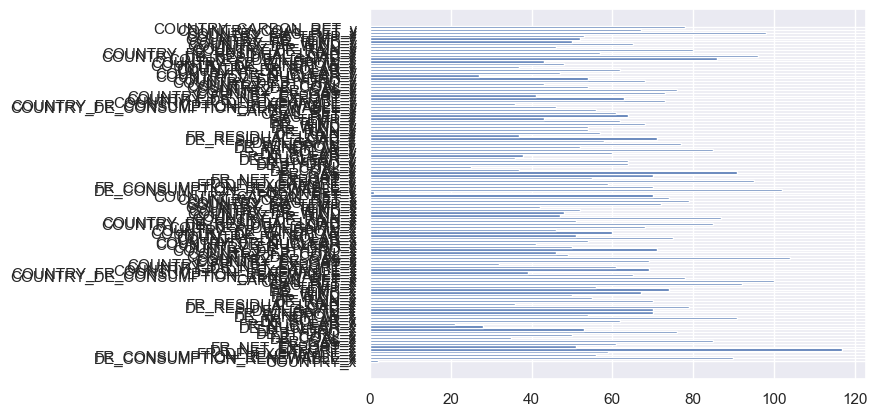

In [421]:
l = dict(zip(X_train_m.columns,model.feature_importances_))
plt.barh(list(l.keys()),list(l.values()))

In [422]:
y_pred = model.predict(X_train_m)
print('train', loss_0_1(1*(y_pred<0),np.array(y_train_m)>0))

y_pred = model.predict(X_val_best_merge)
print('val_test', loss_0_1(1*(y_pred<0),np.array(y_val_best_merge)>0))

y_pred = model.predict(X_val_m)
print('val', loss_0_1(1*(y_pred<0),np.array(y_val_m)>0))

y_pred = model.predict(X_test_m)
print('test', loss_0_1(1*(y_pred<0),np.array(y_test_m)>0))

train 0.8414064135060345
val_test 0.6530431407756548
val 0.8403617625407509
test 0.8403617625407509


In [423]:
#print('train',model.score(X_train_m,np.array(y_train_m)))
#print('test',model.score(X_test_m,np.array(y_test_m)))
'''
y_pred = model.predict(X_train_m)
print(loss_0_1(1*(y_pred<0),np.array(y_train_m)>0))
y_pred = model.predict(X_test_m)
print(loss_0_1(1*(y_pred<0),np.array(y_test_m)>0))
'''

'\ny_pred = model.predict(X_train_m)\nprint(loss_0_1(1*(y_pred<0),np.array(y_train_m)>0))\ny_pred = model.predict(X_test_m)\nprint(loss_0_1(1*(y_pred<0),np.array(y_test_m)>0))\n'

In [424]:
X_test.index = id_test

In [425]:
import functools

def comparator(x,y):
    #return model.predict(np.array(X_test.loc[x])-np.array(X_test.loc[y]).reshape(1,-1)) 
    return model.predict(np.hstack((np.array(X_test.loc[x]),np.array(X_test.loc[y]))).reshape(1,-1)) 
    #return -2*model.predict(np.hstack((np.array(X_test.loc[x]),np.array(X_test.loc[y]))).reshape(1,-1)) + 1
    #return -2*model.predict(np.array(X_test.loc[x])-np.array(X_test.loc[y]).reshape(1,-1)) + 1


In [426]:
l = np.array(id_test)
l = sorted(l, key=functools.cmp_to_key(comparator))

In [427]:
y_pred = np.arange(len(l))

sub = pd.DataFrame()
sub['ID'] = l  
sub['TARGET'] = y_pred

sub.to_csv("submissions/LR.csv",index=False)

In [428]:
sub

,ID,TARGET
0,525,0
1,730,1
2,697,2
3,539,3
4,1477,4
...,...,...
649,1656,649
650,264,650
651,1636,651
652,702,652


In [429]:
y_best = pd.read_csv("submissions/best_models/best_mape_augmented_3.csv")
test = pd.merge(sub,y_best,on='ID')
test.corr()

,ID,TARGET_x,TARGET_y
ID,1.000000,-0.269477,0.112504
TARGET_x,-0.269477,1.000000,0.391117
TARGET_y,0.112504,0.391117,1.000000
